In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
X = X[:, ::-1]    # flip axes for better plotting 

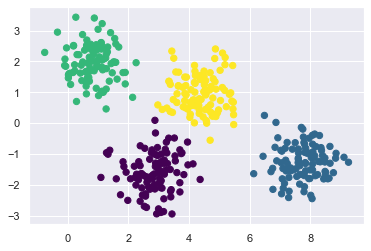

In [6]:
# plotting the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [5]:
def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5,zorder=1))

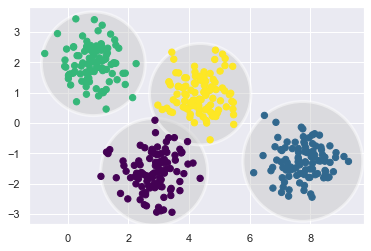

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [17]:
rng = np.random.RandomState(13)
# rng.randn(2,2)
# X_stretched = np.dot(X, rng.randn(2,2))
# X_stretched.shape

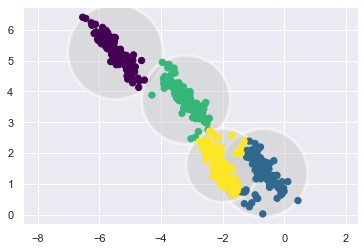

In [18]:
X_stretched = np.dot(X, rng.randn(2,2))
kmeans = KMeans(n_clusters=4, random_state=0)

plot_kmeans(kmeans, X_stretched)

# E-M:Gaussian Mixture Models

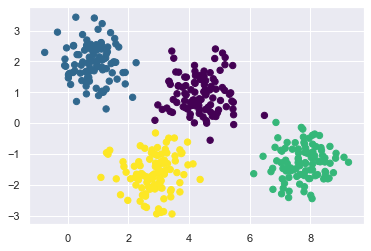

In [20]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [23]:
probs = gmm.predict_proba(X)
a = probs.max(1)
print(probs[:5].round(3))


[[0.531 0.    0.469 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]
[0.53076163 1.         1.         0.9999084  1.         1.
 0.99999998 0.98569825 0.99999571 0.99999674 1.         1.
 0.99963109 0.99999972 0.99655634 0.99999998 0.99999998 1.
 0.99998659 0.99841066 0.99535503 0.99999986 1.         0.99999777
 0.99999161 1.         0.99999621 0.98566064 0.99999992 1.
 0.99983799 0.99998858 0.99999902 0.99999508 0.99193579 1.
 0.99999987 0.99999967 0.99999851 0.99970494 0.99999613 0.99999963
 0.99999999 0.99906217 1.         1.         1.         0.99999998
 1.         0.99999999 1.         0.99999988 0.99999917 1.
 0.99999998 1.         0.9924325  0.99999999 0.99829943 0.99976004
 0.99999926 1.         0.99999998 0.99923337 0.99998185 0.9999998
 0.99999999 0.92253448 0.93301639 0.99250112 0.99952893 0.99839434
 0.99999941 0.99999999 0.9999963  0.99398018 0.97941798 0.99999937
 0.99986916 0.99935054 0.99976741 0.999989

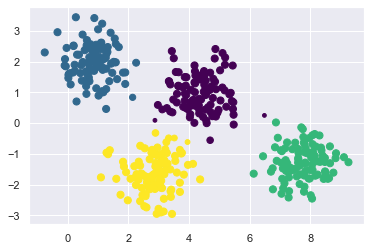

In [26]:
size = 50 * probs.max(1) ** 2      # square emphasizes difference
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [39]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ''' Draw an ellipse with a given position and caovariance'''
    
    ax = ax or plt.gca()
    
    # convert covariance to principle axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
        
    # Draw the ellipse
    for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
            
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis',
                  zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

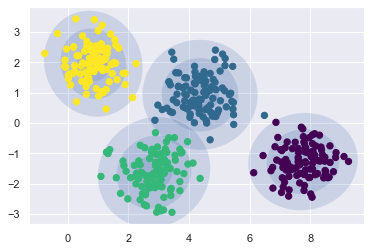

In [40]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

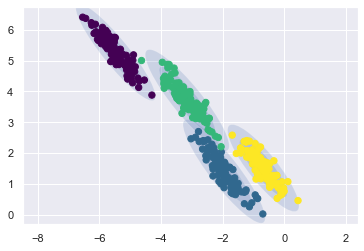

In [41]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

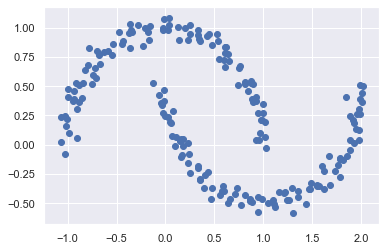

In [42]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

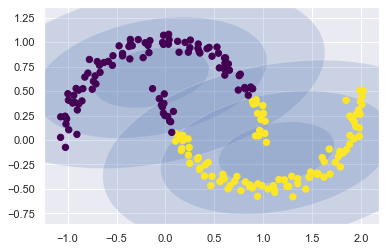

In [43]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

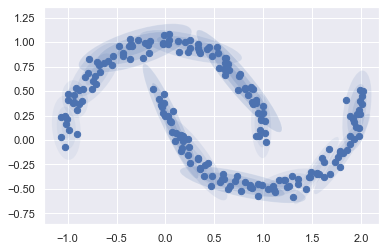

In [52]:
gmm_n = GMM(n_components=14, covariance_type='full', random_state=0)
plot_gmm(gmm_n, Xmoon, label=False)

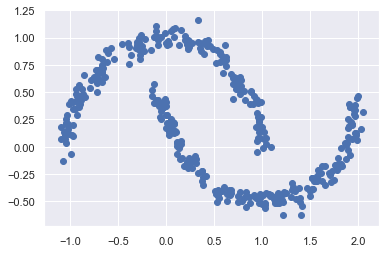

In [53]:
# Generate new random data distributed 
Xnew, Ynew = gmm_n.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);